In [1]:
# auto reload modules when edited
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy

# plt settings and interactive plot
plt.style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]

from ftnmr import *

### Hydrogens and their frequencies and ratios

In [102]:
from string import ascii_lowercase as asc
from scipy.special import binom
from itertools import product

gamma = 267.52218744*pow(10, 6)
B = 10.0

A = {
    'a':(1, 2.3),
    'b':(1, 3.3),
    'c':(3, 4.5)}

j1 = ('a', 'b', 3.200)
j2 = ('b', 'c', 3.200)
B = [j1, j2]

C = {a:[] for a in A}
print(C)

for k in A:
    for b in B:
        if k == b[0]: C[k].append( (b[2], A[b[1]][0]) )
        elif k == b[1]: C[k].append( (b[2], A[b[0]][0]) )

F = {a:([], []) for a in A}
for k in A:
    for b, d in C[k]:
        F[k][0].append( np.array([n*b/2 for n in range(-d, d+1, 2)]) )
        F[k][1].append( np.array([binom(d, x)/pow(2,d) for x in range(0, d+1)]))

# this combines the above two cells into one

F = {a:([], []) for a in A}

for k in A:
    for b in B:
        if k == b[0]: 
            d = A[b[1]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )
        elif k == b[1]: 
            d = A[b[0]][0]
            F[k][0].append( [n*b[2]/2 for n in range(-d, d+1, 2)] )
            F[k][1].append( [binom(d, x)/pow(2,d) for x in range(0, d+1)] )

from itertools import product

G = {a:([], []) for a in A}

for k in A:
    for i in product(*F[k][0]):
        G[k][0].append(sum(i))
        
    for i in product(*F[k][1]):
        G[k][1].append(np.prod(i))

I = {k:([],[]) for k in A}

for k in A:
    for n in np.argsort(H[k][0]):
        I[k][0].append(H[k][0][n])
        I[k][1].append(H[k][1][n])

K = {k:([J0[k][0]],[J1[k][0]]) for k in A}

for k in A:
    for i in range(1, len(J[k][0])):
        if np.isclose(K[k][0][-1], J[k][0][i]):
            K[k][1][-1] += J[k][1][i]
        else:
            K[k][0].append(J[k][0][i])
            K[k][1].append(J[k][1][i])

### Molecule construction

In [9]:
hydrogens = {
        'a':(3, 2.3),
        'b':(4, 3.3),
        'c':(4, 4.5)}

j1 = ('a', 'b', 2.000)
j2 = ('b', 'c', 3.500)
couplings = [j1, j2]

from itertools import product
A = list(dict.fromkeys([k for b in couplings for k in b[:-1]]))
B = {k:[ (b[2], hydrogens[ b[ 1-b.index(k) ] ][0]) for b in couplings if k in b] for k in A}

F0 = {k:[ [n*b/2 for n in range(-d, d+1, 2)] for b, d in B[k]] for k in A}
F1 = {k:[ [binom(d, x)/pow(2,d) for x in range(0, d+1)] for b, d in B[k]] for k in A}
G0 = {k:[ sum(i) for i in product(*F0[k]) ] for k in A}
G1 = {k:[ np.prod(i) for i in product(*F1[k]) ] for k in A}
J0 = {k:[G0[k][n] for n in np.argsort(G0[k])] for k in A}
J1 = {k:[G1[k][n] for n in np.argsort(G0[k])] for k in A}

ind = lambda k: filter(lambda i: not np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
K0 = {k:[J0[k][i] for i in ind(k)] for k in A}
K1 = {k:[J1[k][i] for i in ind(k)] for k in A}

dup = lambda k: filter(lambda i: np.isclose(J0[k][i-1], J0[k][i]), range(0, len(J0[k])))
for k in A:
    n = 0
    for i in dup(k):
        K1[k][i-1-n] += J1[k][i]
        n += 1

### Combining all molecules

The representative spectrum 1H NMR obtained from serum samples of HC subjects. The following metabolites are identified: 

1, L_1; 

2, L_2; 

3, Isoleucine; 

4, Leucine; 

5, Valine; 

6, Unk_1; 

7, 3-Hydroxybutyrate; 

8, L_3; 

9, L_4; 

10, L_5; 

11, Lactate; 

12, Alanine; 

13, L_6; 

14, Acetate; 

15, L_7; 

16, L_8; 

17, NAC; 

18, Acetone; 

19, Acetoacetate; 

20, Pyruvate; 

21, Glutamine; 

22, Citrate; 

23, Unk_2; 

24, Creatine; 

25, Dimethyl sulfone; 

26, Chol+GPC+APC; 

27, Glucose; 

28, Betaine; 

29, Methanol; 

30, Glycerol; 

31, Creatinine; 

32, L_9; 

33, Tyrosine; 

34, π-Methylhistidine; 

35, Phenylalanine; 

36, Formate

In [5]:
hydrogens = {
    'a':(3, 1.100),
    'b':(2, 3.600),
    'c':(1, 3.250)}

j1 = ('a', 'b', 5.000)
couplings = [j1]
ethanol = molecule(hydrogens=hydrogens, couplings=couplings)

hydrogens = {
    'a':(3, 1.300),
    'b':(1, 4.100)}

j1 = ('a', 'b', 7.000)
couplings = [j1]
lactate = molecule(hydrogens=hydrogens, couplings=couplings)

hydrogens = {
    'a':(1, 3.900),
    'b':(9, 3.250)}

couplings = []
betaine = molecule(hydrogens=hydrogens, couplings=couplings)

hydrogens = {
    'a':(12, 10.0)}

couplings = []
TMS =  molecule(hydrogens=hydrogens, couplings=couplings)

molecules = {
    'A':(ethanol, 4.523),
    'B':(lactate, 6.782),
    'C':(betaine, 4.321),
    'D':(TMS, 1.0)}

In [154]:
hydrogens = {
    'a':(2, 3.231, 120.3),
    'b':(6, 1.873, 089.3)}

couplings = [
    ('a', 'b', 5.439)]

A = molecule(hydrogens=hydrogens, couplings=couplings)

hydrogens = {
    'a':(2, 2.560, 143.0),
    'b':(3, 4.313, 143.0),
    'c':(2, 3.486, 143.0)}

couplings = [
    ('a', 'b', 10.342),
    ('a', 'c', 7.034)]

B = molecule(hydrogens=hydrogens, couplings=couplings)

hydrogens = {
    'a':(12, 10.0, 200.0)}

couplings = []
C =  molecule(hydrogens=hydrogens, couplings=couplings)

molecules = {
    'A':(A, 3.424),
    'B':(B, 6.234),
    'C':(C, 1.000)}

In [260]:
molecules

{'A': (<ftnmr.molecule at 0x7f5c26b5c6d0>, 3.424),
 'B': (<ftnmr.molecule at 0x7f5c26b5c9a0>, 6.234),
 'C': (<ftnmr.molecule at 0x7f5c26b5c7f0>, 1.0)}

### Spectrometer Class with Sample

In [214]:
spec = spectrometer(t_cut=1500)

In [257]:
spec.artifact(baseline=True)
spec.measure(moles=molecules)

In [259]:
%matplotlib ipympl
plt.plot(spec.shift, spec.spectra.real, linewidth=0.5)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

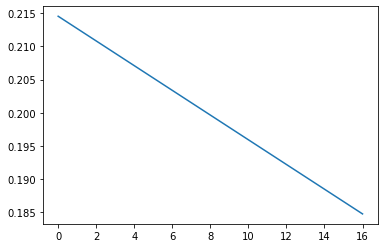

In [258]:
%matplotlib inline
plt.plot(spec.shift, spec.spectra_artifact)
plt.show()

### Spline Interpolation

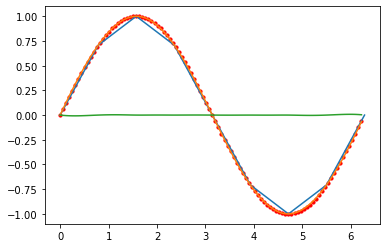

In [104]:
from scipy import interpolate

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)

plt.plot(x, y)

tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
y_real = np.sin(xnew)
ynew = interpolate.splev(xnew, tck, der=0)

plt.plot(xnew, ynew)
plt.scatter(xnew, y_real, color='r', s=10)

dy = y_real - ynew
plt.plot(xnew, dy)
plt.show()

### NMR baseline artifact

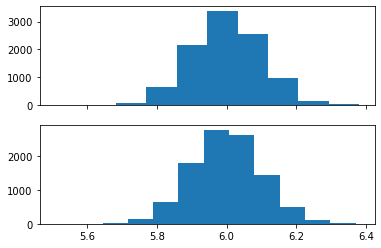

In [105]:
from scipy import stats
from scipy.stats import truncnorm

lower, upper = 5.5, 6.5
mu, sigma = 6.0, 0.1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
N = stats.norm(loc=mu, scale=sigma)

fig, ax = plt.subplots(2, sharex=True)
ax[0].hist(X.rvs(10000))
ax[1].hist(N.rvs(10000))
plt.show()

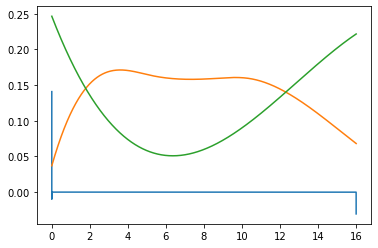

In [106]:
l, u = 5.5, 6.5
mu, std = 6.0, 0.1

a = (l - mu) / sd
b = (u - mu) / sd
stats.truncnorm(a, b, loc=mu, scale=sd).rvs(1)[0]

n = np.random.randint(2, 11)
x = spec.shift
D = np.random.uniform(0.1, 0.6, n+1)

if 2 < n:
    bin_size = spec.shift_cutoff/n
    std = bin_size/10
    b = 0.5*bin_size/std
    A = np.array([0]
                 +[truncnorm(-b, b, loc=bin_size*mu, scale=std).rvs(1)[0] for mu in range(1, n)]
                 +[spec.shift_cutoff])

    tck = interpolate.splrep(A, D, s=0)
    y = interpolate.splev(x, tck, der=0)
else:
    y = (D[-1]-D[0])/spec.shift_cutoff*x + D[0]

spec.artifact(baseline=True)
yr =spec.spectra_artifact

spec.artifact(baseline=True)
yi =spec.spectra_artifact

y = yr +1j*yi
Y = np.fft.ifft(y)

plt.plot(spec.shift, Y.real)
plt.plot(spec.shift, yr)
plt.plot(spec.shift, yi)
plt.show()

### Chi and Gamma

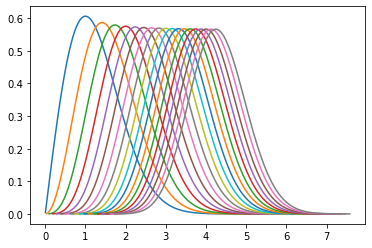

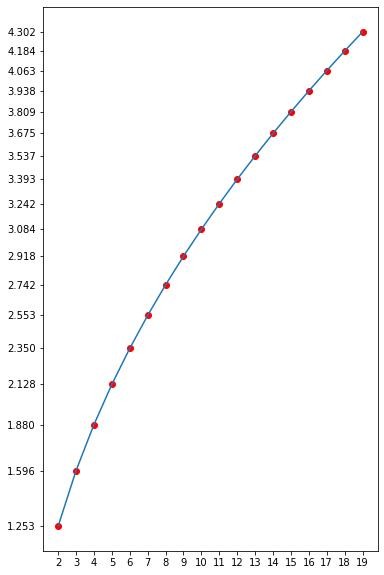

Signature: chi.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    lower tail probability
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
x : array_like
    quantile corresponding to the lower tail probability q.
File:      ~/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method


In [107]:
from scipy.stats import chi
from scipy.special import gamma

plt.rcParams['figure.figsize'] = [6, 4]

a = 0.00001
b = 1 - a

for k in range(2, 20):
    k = k
    x = np.linspace(chi.ppf(a, k), chi.ppf(b, k), 100)
    y = chi.pdf(x, k)
    plt.plot(x, y)

plt.show()

def cm(k):
    return np.sqrt(2)*gamma((k+1)/2)/gamma(k/2)

plt.rcParams['figure.figsize'] = [6, 10]
means = [cm(k) for k in range(2, 20)]
ks = np.linspace(2, 19, len(means))
plt.plot(ks, means)
plt.scatter(ks, means, color='r')
plt.xticks(ks)
plt.yticks(means)
plt.show()

chi.ppf?